## Observations and Insights 

In [29]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress 

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_data_df = pd.merge(mouse_metadata_df,study_results_df, on="Mouse ID")
# Display the data table for preview
combined_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.
combined_data_df["Mouse ID"].nunique()

249

In [31]:
# checking the numer of mice depending on the mouse id
combined_data_df["Mouse ID"].value_counts()

g989    13
e584    10
m269    10
k403    10
u364    10
        ..
n482     1
v199     1
h428     1
d133     1
u153     1
Name: Mouse ID, Length: 249, dtype: int64

In [32]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_data_df = combined_data_df[["Mouse ID","Timepoint"]][combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]
duplicated_data_df.head()

,Mouse ID,Timepoint
909,g989,0
911,g989,5
913,g989,10
915,g989,15
917,g989,20


In [33]:
# Optional: Get all the data for the duplicate mouse ID. 
combined_data_df[combined_data_df.duplicated(subset=["Mouse ID","Timepoint"])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [34]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data_df = combined_data_df.drop(combined_data_df[combined_data_df["Mouse ID"] == "g989"].index)

In [35]:
cleaned_data_df["Mouse ID"].value_counts()

e584    10
l471    10
b879    10
k210    10
a203    10
        ..
x226     1
n482     1
o848     1
d133     1
t573     1
Name: Mouse ID, Length: 248, dtype: int64

In [36]:
# Checking the number of mice in the clean DataFrame.
cleaned_data_df["Mouse ID"].nunique()

248

## Summary Statistics

In [37]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_groupby_df = cleaned_data_df.groupby("Drug Regimen")
regimen_groupby_counts_df = cleaned_data_df.groupby("Drug Regimen").count()
regimen_groupby_counts_df

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Drug Regimen,,,,,,,
Capomulin,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186
Placebo,181,181,181,181,181,181,181
Propriva,148,148,148,148,148,148,148
Ramicane,228,228,228,228,228,228,228
Stelasyn,181,181,181,181,181,181,181


In [38]:
regimen_mean = regimen_groupby_df["Tumor Volume (mm3)"].mean()
regimen_median = regimen_groupby_df["Tumor Volume (mm3)"].median()
regimen_variance = regimen_groupby_df["Tumor Volume (mm3)"].var()
regimen_std = regimen_groupby_df["Tumor Volume (mm3)"].std()
regimen_SEM = regimen_groupby_df["Tumor Volume (mm3)"].sem()

# This method is the most straighforward, creating multiple series and putting them all together at the end.
regimen_summary = pd.DataFrame({
                                "mean":regimen_mean,
                                "median":regimen_median,
                                "variance":regimen_variance,
                                "standard deviation":regimen_std,
                                "SEM":regimen_SEM})

regimen_summary

,mean,median,variance,standard deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0.5, 1.0, 'Count of Mice for each regimen')

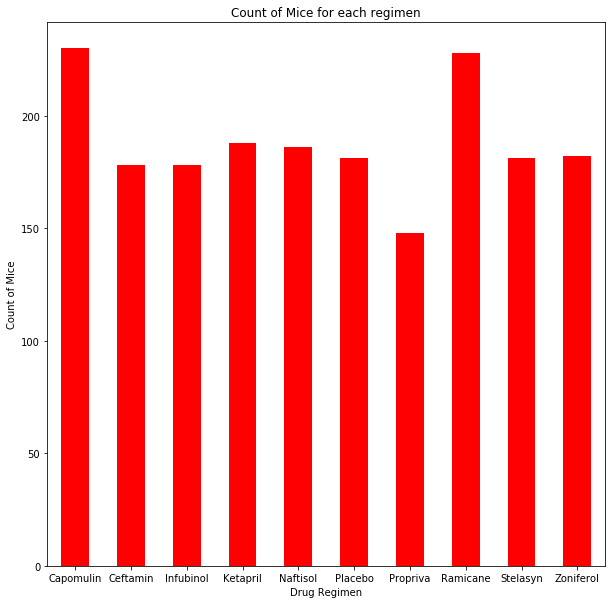

In [39]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
regimen_counts_plt = regimen_groupby_counts_df["Mouse ID"].plot(kind="bar", facecolor = "red", figsize=(10,10),rot=0)
regimen_counts_plt.set_ylabel("Count of Mice")
regimen_counts_plt.set_title("Count of Mice for each regimen")

Text(0.5, 1.0, 'Count of Mice for each regimen')

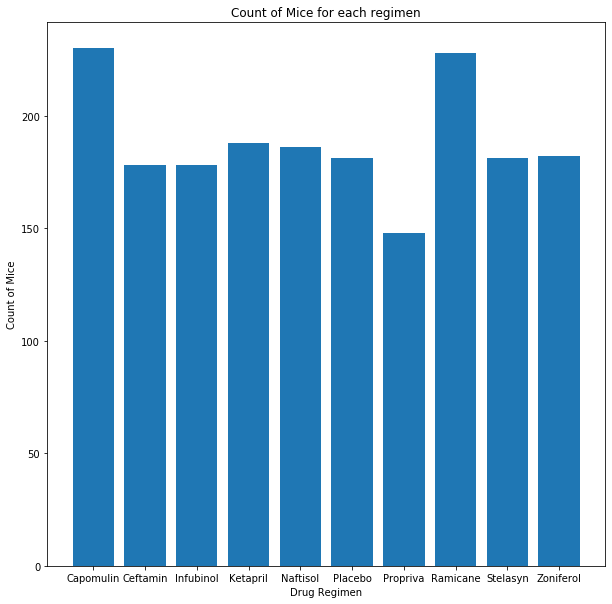

In [40]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
plt.figure(figsize=(10,10))
plt.bar(regimen_groupby_counts_df.index.values,regimen_groupby_counts_df["Mouse ID"])
plt.xlabel("Drug Regimen")
plt.ylabel("Count of Mice")
plt.title("Count of Mice for each regimen")

Text(0.5, 1.0, 'Count of Mice Sex')

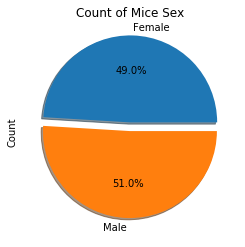

In [41]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
sex_groupby_df = cleaned_data_df.groupby("Sex")
sex_groupby_count_df = sex_groupby_df.count()
sex_groupby_count_df["Count"] = sex_groupby_count_df["Mouse ID"]

explode = (0.1,0)
sex_counts_plt = sex_groupby_count_df["Count"].plot(kind="pie",autopct="%1.1f%%",explode = explode,shadow = True)
sex_counts_plt.set_title("Count of Mice Sex")

Text(0.5, 1.0, 'Count of Mice Sex')

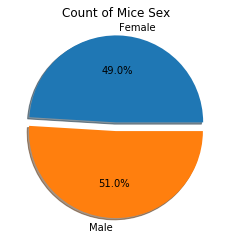

In [42]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sizes = sex_groupby_count_df["Mouse ID"]
labels = sex_groupby_count_df.index.values
plt.pie(sizes,labels=labels,explode = explode,autopct="%1.1f%%",shadow = True)
plt.title("Count of Mice Sex")

## Quartiles, Outliers and Boxplots

In [43]:
# Start by getting the last (greatest) timepoint for each mouse
mouse_l_timepoint = cleaned_data_df.groupby("Mouse ID")["Timepoint"].max()
mouse_l_timepoint = mouse_l_timepoint.reset_index()
mouse_l_timepoint

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30
...,...,...
243,z435,10
244,z578,45
245,z581,45
246,z795,45


In [44]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mouse_l_timepoint = mouse_l_timepoint.reset_index()
merged_df = mouse_l_timepoint.merge(cleaned_data_df,on = ["Mouse ID","Timepoint"],how = "left")
merged_df.head()


,index,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,0,a203,45,Infubinol,Female,20,23,67.973419,2
1,1,a251,45,Infubinol,Female,21,25,65.525743,1
2,2,a262,45,Placebo,Female,17,29,70.717621,4
3,3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [45]:
# the final tumor volume of each mouse for the four regimens
final_tumor_volume = merged_df[["Drug Regimen","Mouse ID","Tumor Volume (mm3)"]].groupby(["Drug Regimen","Mouse ID"])
final_tumor_volume_dedf = final_tumor_volume["Tumor Volume (mm3)"].mean()
final_tumor_volume_dedf_cap = final_tumor_volume_dedf.loc["Capomulin"]
final_tumor_volume_dedf_ram = final_tumor_volume_dedf.loc["Ramicane"]
final_tumor_volume_dedf_inf = final_tumor_volume_dedf.loc["Infubinol"]
final_tumor_volume_dedf_cef = final_tumor_volume_dedf.loc["Ceftamin"]

In [46]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin","Ramicane","Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
total_results = {"Capomulin":[],"Ramicane":[],"Infubinol":[],"Ceftamin":[]}
n = 0
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    outliners = []
    final_tumor_volume = []
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset   
    final_tumor_volume = merged_df.loc[merged_df["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    total_results[treatment] = final_tumor_volume
    quartiles = final_tumor_volume.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    IQR = upperq - lowerq
    lower_bound = lowerq - 1.5*IQR
    upper_bound = upperq + 1.5*IQR
    print(f"Tumor volume analysis for {treatments[n]} regimen")
    print(f"Lower bound: {lower_bound}  Upper bound: {upper_bound}")
    print(f"IQR: {IQR}")
    # Determine outliers using upper and lower bounds
    outliers = final_tumor_volume.loc[(final_tumor_volume>upper_bound)|(final_tumor_volume<lower_bound)]
    
    count = len(outliers)
    
    if count == 0 :
        print(f"There are no potential outliners of tumor volume for {treatments[n]} regimen")
    elif count != 0: 
        print(f"There are {count} potential outliners of tumor volume for {treatments[n]} regimen:{outliers}")
    n = n + 1
    print("-----------------------------------------------------------------------")
    
    

Tumor volume analysis for Capomulin regimen
Lower bound: 20.70456164999999  Upper bound: 51.83201549
IQR: 7.781863460000004
There are no potential outliners of tumor volume for Capomulin regimen
-----------------------------------------------------------------------
Tumor volume analysis for Ramicane regimen
Lower bound: 17.912664470000003  Upper bound: 54.30681135
IQR: 9.098536719999998
There are no potential outliners of tumor volume for Ramicane regimen
-----------------------------------------------------------------------
Tumor volume analysis for Infubinol regimen
Lower bound: 36.83290494999999  Upper bound: 82.74144559000001
IQR: 11.477135160000003
There are 1 potential outliners of tumor volume for Infubinol regimen:31    36.321346
Name: Tumor Volume (mm3), dtype: float64
-----------------------------------------------------------------------
Tumor volume analysis for Ceftamin regimen
Lower bound: 25.355449580000002  Upper bound: 87.66645829999999
IQR: 15.577752179999997
There 

In [47]:
Ceftamin = total_results["Ceftamin"]
Ramicane = total_results["Ramicane"]
Infubinol = total_results["Infubinol"]
Ceftamin = total_results["Ceftamin"]

Text(0.5, 1.0, 'Final Tumor Volume under Four Regimens')

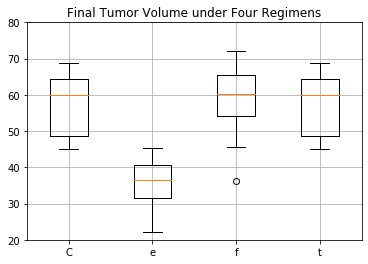

In [48]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# ,total_results["Ramicane"],total_results["Infubinol"],total_results["Ceftamin"]
plt.boxplot([Ceftamin,Ramicane,Infubinol,Ceftamin])
plt.xticks([1,2,3,4],treatment)
plt.grid()
plt.ylim(20,80)
plt.title("Final Tumor Volume under Four Regimens")

## Line and Scatter Plots

Text(0, 0.5, 'Time Point')

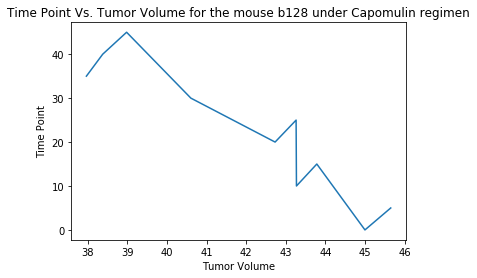

In [49]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

b128_data = cleaned_data_df[(cleaned_data_df["Drug Regimen"]=="Capomulin")&(cleaned_data_df["Mouse ID"]=="b128")]
b128_sorted_data = b128_data.sort_values("Tumor Volume (mm3)")
b128_tumor = b128_sorted_data["Tumor Volume (mm3)"]
b128_time = b128_sorted_data["Timepoint"]
plt.plot(b128_tumor,b128_time)
plt.title("Time Point Vs. Tumor Volume for the mouse b128 under Capomulin regimen")
plt.xlabel("Tumor Volume")
plt.ylabel("Time Point")

Text(0, 0.5, 'Mouse Weight')

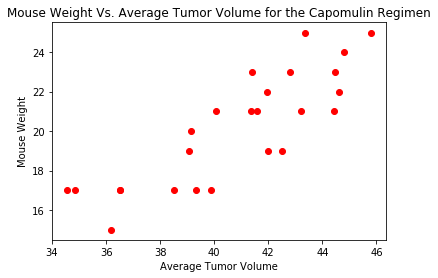

In [50]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
mouse_regiment_df = cleaned_data_df.groupby(["Drug Regimen","Mouse ID"])
mouse_avg_tumor = mouse_regiment_df[["Tumor Volume (mm3)","Weight (g)"]].mean()
mouse_avg_tumor_cap = mouse_avg_tumor.loc["Capomulin"]
mouse_avg_tumor_cap
avg_tumor_cap = mouse_avg_tumor_cap["Tumor Volume (mm3)"]
avg_weight_cap = mouse_avg_tumor_cap["Weight (g)"]
plt.scatter(avg_tumor_cap,avg_weight_cap,marker = "o",color = "r")
plt.title("Mouse Weight Vs. Average Tumor Volume for the Capomulin Regimen")
plt.xlabel("Average Tumor Volume")
plt.ylabel("Mouse Weight")

## Correlation and Regression

In [51]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(avg_weight_cap,avg_tumor_cap)
print(f"The correlation between both factors is {round(correlation[0],2)}")
(slope, intercept, rvalue, pvalue, stderr) = linregress(avg_tumor_cap, avg_weight_cap)
regress_values = avg_tumor_cap * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"The linear regression equation between both factors is {line_eq}")


The correlation between both factors is 0.84
The linear regression equation between both factors is y = 0.74x + -10.15
